# Relatorio de Analise VII

## Criando Agrupamentos

In [29]:
import pandas as pd

In [30]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')

In [31]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [32]:
dados['Valor'].mean()

5046.172821405663

In [33]:
bairros = dados['Bairro'][:10].unique()
bairros

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos'], dtype=object)

In [34]:
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [35]:
dados['Bairro'].drop_duplicates()

0             Copacabana
1        Jardim Botânico
2                 Centro
3           Higienópolis
4               Cachambi
5        Barra da Tijuca
6                  Ramos
7                 Grajaú
8    Lins de Vasconcelos
Name: Bairro, dtype: object

In [36]:
grupo_bairro = dados.groupby('Bairro')

In [37]:
type(grupo_bairro)

pandas.core.groupby.groupby.DataFrameGroupBy

In [38]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Cachambi': Int64Index([    4,    56,   247,   252,   525,   629,  1389,  1683,  1862,
              1949,
             ...
             19245, 19284, 19825, 20069, 20320, 20706, 21411, 21444, 21466,
             21605],
            dtype='int64', length=132),
 'Centro': Int64Index([    2,    38,    65,    71,   146,   181,   191,   312,   427,
               585,
             ...
             21089, 21201, 21321, 21412, 21474, 21545, 21625, 21748, 21804,
             21822],
            dtype='int64', length=343),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
     

In [39]:
for bairros, data in grupo_bairro:
    print(f'{bairros} -> {round(data.Valor.mean(),2)}')

Barra da Tijuca -> 7069.55
Cachambi -> 1157.17
Centro -> 1254.75
Copacabana -> 4126.68
Grajaú -> 2038.62
Higienópolis -> 1006.25
Jardim Botânico -> 8722.36
Lins de Vasconcelos -> 1086.17
Ramos -> 958.0


In [40]:
grupo_bairro['Valor'].mean().round(2)

Bairro
Barra da Tijuca        7069.55
Cachambi               1157.17
Centro                 1254.75
Copacabana             4126.68
Grajaú                 2038.62
Higienópolis           1006.25
Jardim Botânico        8722.36
Lins de Vasconcelos    1086.17
Ramos                   958.00
Name: Valor, dtype: float64

In [41]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Cachambi,1157.17,452.77
Centro,1254.75,422.57
Copacabana,4126.68,1148.68
Grajaú,2038.62,575.02
Higienópolis,1006.25,185.50
Jardim Botânico,8722.36,1059.24
Lins de Vasconcelos,1086.17,11502.60
Ramos,958.00,112.83


## Estatisticas Descritivas

In [42]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Cachambi,132.0,1157.17,351.49,600.0,900.0,1100.0,1300.0,2800.0
Centro,343.0,1254.75,884.67,400.0,800.0,1000.0,1400.0,12000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Grajaú,145.0,2038.62,4901.99,650.0,1250.0,1500.0,1700.0,60000.0
Higienópolis,16.0,1006.25,409.42,700.0,800.0,875.0,1100.0,2400.0
Jardim Botânico,263.0,8722.36,9332.73,1550.0,3150.0,4000.0,10000.0,50000.0
Lins de Vasconcelos,47.0,1086.17,439.58,500.0,850.0,1000.0,1125.0,2800.0
Ramos,35.0,958.00,285.08,500.0,750.0,900.0,1100.0,1700.0


In [49]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum', 'mean']).round(1).rename(columns = {'min': 'Minimo', 'max': 'Máximo', 'sum': 'Soma', 'mean': 'Média'})

,Minimo,Máximo,Soma,Média
Bairro,,,,
Barra da Tijuca,800.0,600000.0,27309683.0,7069.6
Cachambi,600.0,2800.0,152747.0,1157.2
Centro,400.0,12000.0,430380.0,1254.8
Copacabana,100.0,35000.0,10910934.0,4126.7
Grajaú,650.0,60000.0,295600.0,2038.6
Higienópolis,700.0,2400.0,16100.0,1006.2
Jardim Botânico,1550.0,50000.0,2293980.0,8722.4
Lins de Vasconcelos,500.0,2800.0,51050.0,1086.2
Ramos,500.0,1700.0,33530.0,958.0


In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5,1,'Valor Medio do Aluguel por Bairro')

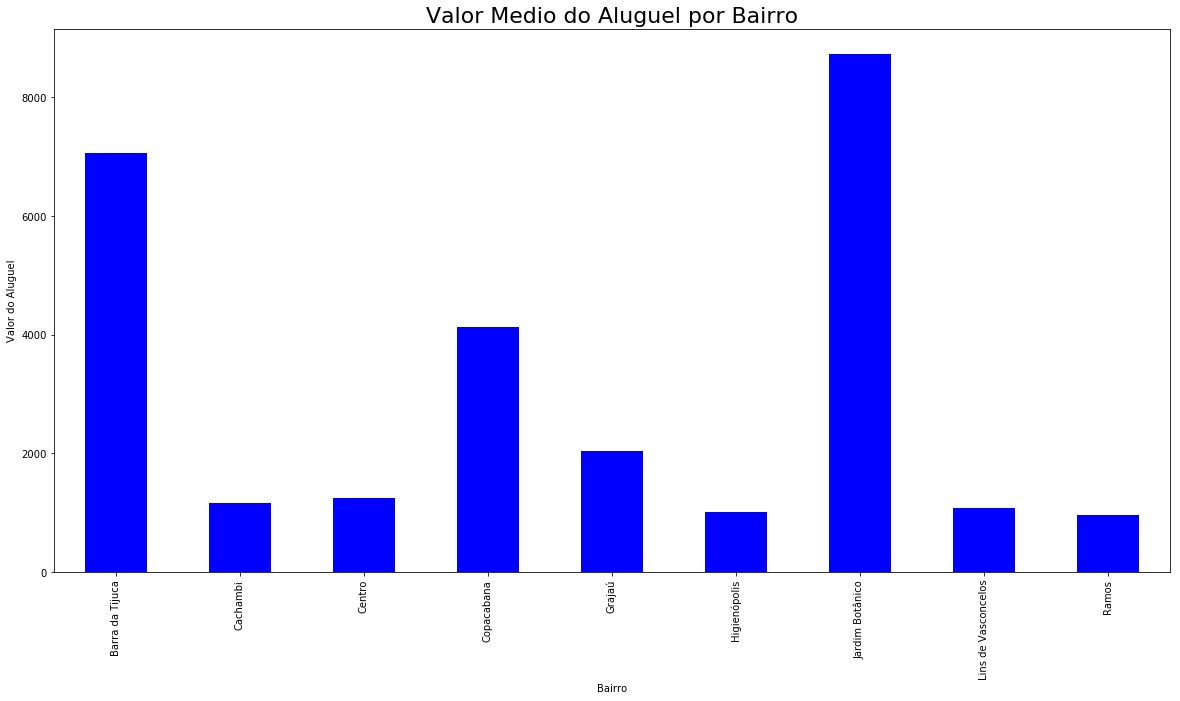

In [57]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Medio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5,1,'Valor Máximo do Aluguel por Bairro')

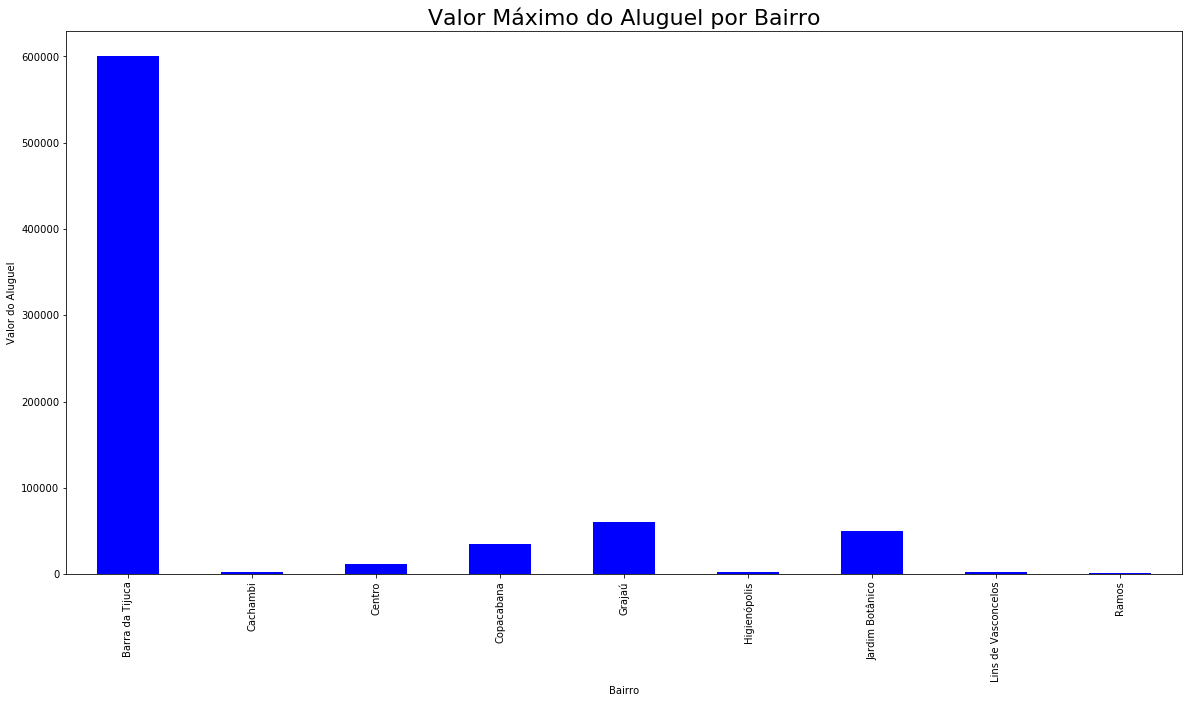

In [60]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize': 22})

Text(0.5,1,'Contagem de Aluguel por Bairro')

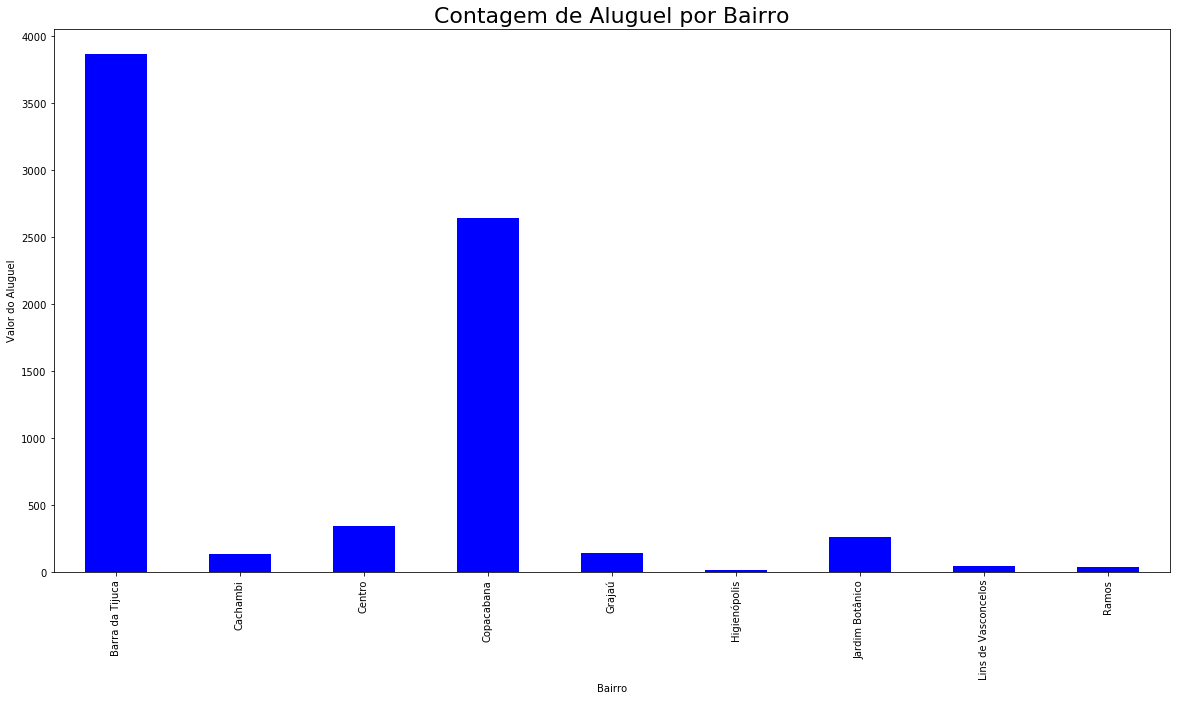

In [61]:
fig = grupo_bairro['Valor'].count().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Contagem de Aluguel por Bairro', {'fontsize': 22})